# Description

Runs spectral clustering on the umap version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 50000

## Input data

In [6]:
INPUT_SUBSET = "umap"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

## Clustering

In [10]:
from sklearn.cluster import SpectralClustering

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["GAMMA"] = 1.0e-10
CLUSTERING_OPTIONS["AFFINITY"] = "rbf"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'GAMMA': 1e-10,
 'AFFINITY': 'rbf'}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = SpectralClustering(
            eigen_solver="arpack",
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            affinity=CLUSTERING_OPTIONS["AFFINITY"],
            gamma=CLUSTERING_OPTIONS["GAMMA"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(eigen_solver='arpack', gamma=1e-10, n_clusters=2,
                    random_state=50000))

('SpectralClustering #1',
 SpectralClustering(eigen_solver='arpack', gamma=1e-10, n_clusters=2,
                    random_state=50001))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3749, 50)

In [20]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,11.531590,10.773390,10.551500,5.689103,12.646474,8.795625,2.365859,-3.382425,1.458605,14.236823,...,2.214731,9.304909,3.359118,5.211676,1.265622,2.058685,1.291174,1.565621,7.317275,9.037535
100002_raw-Energy,11.554761,10.753816,10.548004,5.710800,12.674987,8.787647,2.379787,-3.339913,1.442655,14.196218,...,2.237087,9.270699,3.383440,5.185328,1.257113,2.057439,1.290686,1.557209,7.297037,9.009866
100003_raw-Protein,11.519615,10.786408,10.540249,5.687959,12.628188,8.789925,2.368370,-3.390937,1.464806,14.233623,...,2.216162,9.314158,3.350708,5.226166,1.267382,2.051692,1.305047,1.558942,7.307035,9.042575
100004_raw-Fat,11.515584,10.756584,10.570711,5.697041,12.661936,8.787330,2.396913,-3.351611,1.435632,14.221588,...,2.214707,9.273252,3.383349,5.220068,1.270067,2.065669,1.281447,1.578588,7.332527,9.005523
100005_raw-Carbohydrate,11.528723,10.762026,10.566773,5.698555,12.671127,8.791903,2.394764,-3.354370,1.442259,14.226301,...,2.216362,9.275563,3.383139,5.216354,1.269187,2.063429,1.280020,1.577227,7.335059,9.009464


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensembles.utils import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:01<05:36,  1.14s/it]

  1%|          | 2/295 [00:02<05:34,  1.14s/it]

  1%|          | 3/295 [00:03<05:33,  1.14s/it]

  1%|▏         | 4/295 [00:04<05:31,  1.14s/it]

  2%|▏         | 5/295 [00:05<05:30,  1.14s/it]

  2%|▏         | 6/295 [00:07<06:05,  1.26s/it]

  2%|▏         | 7/295 [00:08<06:14,  1.30s/it]

  3%|▎         | 8/295 [00:09<06:16,  1.31s/it]

  3%|▎         | 9/295 [00:11<06:01,  1.26s/it]

  3%|▎         | 10/295 [00:12<06:27,  1.36s/it]

  4%|▎         | 11/295 [00:14<06:49,  1.44s/it]

  4%|▍         | 12/295 [00:15<06:31,  1.38s/it]

  4%|▍         | 13/295 [00:16<06:29,  1.38s/it]

  5%|▍         | 14/295 [00:18<06:48,  1.45s/it]

  5%|▌         | 15/295 [00:19<06:22,  1.37s/it]

  5%|▌         | 16/295 [00:21<06:11,  1.33s/it]

  6%|▌         | 17/295 [00:22<06:54,  1.49s/it]

  6%|▌         | 18/295 [00:24<06:31,  1.41s/it]

  6%|▋         | 19/295 [00:26<07:13,  1.57s/it]

  7%|▋         | 20/295 [00:27<07:34,  1.65s/it]

  7%|▋         | 21/295 [00:29<06:59,  1.53s/it]

  7%|▋         | 22/295 [00:30<06:34,  1.44s/it]

  8%|▊         | 23/295 [00:31<06:23,  1.41s/it]

  8%|▊         | 24/295 [00:33<06:29,  1.44s/it]

  8%|▊         | 25/295 [00:34<06:12,  1.38s/it]

  9%|▉         | 26/295 [00:35<06:08,  1.37s/it]

  9%|▉         | 27/295 [00:37<06:49,  1.53s/it]

  9%|▉         | 28/295 [00:38<06:26,  1.45s/it]

 10%|▉         | 29/295 [00:40<06:29,  1.46s/it]

 10%|█         | 30/295 [00:42<07:11,  1.63s/it]

 11%|█         | 31/295 [00:43<06:56,  1.58s/it]

 11%|█         | 32/295 [00:45<06:32,  1.49s/it]

 11%|█         | 33/295 [00:46<06:20,  1.45s/it]

 12%|█▏        | 34/295 [00:48<06:58,  1.60s/it]

 12%|█▏        | 35/295 [00:49<06:40,  1.54s/it]

 12%|█▏        | 36/295 [00:51<06:34,  1.52s/it]

 13%|█▎        | 37/295 [00:53<07:11,  1.67s/it]

 13%|█▎        | 38/295 [00:55<07:35,  1.77s/it]

 13%|█▎        | 39/295 [00:57<07:58,  1.87s/it]

 14%|█▎        | 40/295 [00:58<07:20,  1.73s/it]

 14%|█▍        | 41/295 [01:00<06:55,  1.64s/it]

 14%|█▍        | 42/295 [01:02<07:28,  1.77s/it]

 15%|█▍        | 43/295 [01:03<07:04,  1.68s/it]

 15%|█▍        | 44/295 [01:05<06:53,  1.65s/it]

 15%|█▌        | 45/295 [01:06<06:38,  1.60s/it]

 16%|█▌        | 46/295 [01:08<07:07,  1.72s/it]

 16%|█▌        | 47/295 [01:10<06:50,  1.66s/it]

 16%|█▋        | 48/295 [01:12<07:22,  1.79s/it]

 17%|█▋        | 49/295 [01:14<07:43,  1.88s/it]

 17%|█▋        | 50/295 [01:16<07:06,  1.74s/it]

 17%|█▋        | 51/295 [01:18<07:30,  1.85s/it]

 18%|█▊        | 52/295 [01:19<07:03,  1.74s/it]

 18%|█▊        | 53/295 [01:21<06:37,  1.64s/it]

 18%|█▊        | 54/295 [01:22<06:23,  1.59s/it]

 19%|█▊        | 55/295 [01:23<06:09,  1.54s/it]

 19%|█▉        | 56/295 [01:25<06:13,  1.56s/it]

 19%|█▉        | 57/295 [01:27<06:10,  1.56s/it]

 20%|█▉        | 58/295 [01:29<06:45,  1.71s/it]

 20%|██        | 59/295 [01:31<06:52,  1.75s/it]

 20%|██        | 60/295 [01:33<07:12,  1.84s/it]

 21%|██        | 61/295 [01:35<07:34,  1.94s/it]

 21%|██        | 62/295 [01:36<07:12,  1.86s/it]

 21%|██▏       | 63/295 [01:38<06:45,  1.75s/it]

 22%|██▏       | 64/295 [01:40<06:36,  1.72s/it]

 22%|██▏       | 65/295 [01:41<06:18,  1.65s/it]

 22%|██▏       | 66/295 [01:43<06:06,  1.60s/it]

 23%|██▎       | 67/295 [01:45<06:39,  1.75s/it]

 23%|██▎       | 68/295 [01:46<06:22,  1.68s/it]

 23%|██▎       | 69/295 [01:48<06:07,  1.63s/it]

 24%|██▎       | 70/295 [01:49<06:01,  1.61s/it]

 24%|██▍       | 71/295 [01:51<06:00,  1.61s/it]

 24%|██▍       | 72/295 [01:53<06:03,  1.63s/it]

 25%|██▍       | 73/295 [01:55<06:43,  1.82s/it]

 25%|██▌       | 74/295 [01:57<07:07,  1.93s/it]

 25%|██▌       | 75/295 [01:59<07:04,  1.93s/it]

 26%|██▌       | 76/295 [02:00<06:39,  1.82s/it]

 26%|██▌       | 77/295 [02:02<06:21,  1.75s/it]

 26%|██▋       | 78/295 [02:04<06:17,  1.74s/it]

 27%|██▋       | 79/295 [02:06<06:44,  1.87s/it]

 27%|██▋       | 80/295 [02:08<06:49,  1.91s/it]

 27%|██▋       | 81/295 [02:10<07:00,  1.97s/it]

 28%|██▊       | 82/295 [02:12<06:40,  1.88s/it]

 28%|██▊       | 83/295 [02:13<06:17,  1.78s/it]

 28%|██▊       | 84/295 [02:15<06:08,  1.75s/it]

 29%|██▉       | 85/295 [02:17<06:19,  1.81s/it]

 29%|██▉       | 86/295 [02:19<06:12,  1.78s/it]

 29%|██▉       | 87/295 [02:20<05:58,  1.72s/it]

 30%|██▉       | 88/295 [02:22<05:56,  1.72s/it]

 30%|███       | 89/295 [02:24<06:35,  1.92s/it]

 31%|███       | 90/295 [02:26<06:28,  1.90s/it]

 31%|███       | 91/295 [02:28<06:22,  1.87s/it]

 31%|███       | 92/295 [02:30<06:09,  1.82s/it]

 32%|███▏      | 93/295 [02:31<05:56,  1.76s/it]

 32%|███▏      | 94/295 [02:34<06:34,  1.96s/it]

 32%|███▏      | 95/295 [02:35<06:16,  1.88s/it]

 33%|███▎      | 96/295 [02:37<06:06,  1.84s/it]

 33%|███▎      | 97/295 [02:39<06:31,  1.98s/it]

 33%|███▎      | 98/295 [02:42<06:45,  2.06s/it]

 34%|███▎      | 99/295 [02:44<07:02,  2.15s/it]

 34%|███▍      | 100/295 [02:46<07:14,  2.23s/it]

 34%|███▍      | 101/295 [02:49<07:20,  2.27s/it]

 35%|███▍      | 102/295 [02:51<07:27,  2.32s/it]

 35%|███▍      | 103/295 [02:53<07:02,  2.20s/it]

 35%|███▌      | 104/295 [02:55<06:31,  2.05s/it]

 36%|███▌      | 105/295 [02:57<06:42,  2.12s/it]

 36%|███▌      | 106/295 [03:00<06:56,  2.21s/it]

 36%|███▋      | 107/295 [03:02<07:09,  2.29s/it]

 37%|███▋      | 108/295 [03:05<07:16,  2.33s/it]

 37%|███▋      | 109/295 [03:06<06:47,  2.19s/it]

 37%|███▋      | 110/295 [03:08<06:40,  2.17s/it]

 38%|███▊      | 111/295 [03:11<06:37,  2.16s/it]

 38%|███▊      | 112/295 [03:13<06:52,  2.26s/it]

 38%|███▊      | 113/295 [03:16<07:03,  2.33s/it]

 39%|███▊      | 114/295 [03:18<06:51,  2.27s/it]

 39%|███▉      | 115/295 [03:20<06:37,  2.21s/it]

 39%|███▉      | 116/295 [03:22<06:28,  2.17s/it]

 40%|███▉      | 117/295 [03:24<06:13,  2.10s/it]

 40%|████      | 118/295 [03:26<05:57,  2.02s/it]

 40%|████      | 119/295 [03:28<05:54,  2.01s/it]

 41%|████      | 120/295 [03:30<06:18,  2.16s/it]

 41%|████      | 121/295 [03:33<06:35,  2.28s/it]

 41%|████▏     | 122/295 [03:35<06:47,  2.36s/it]

 42%|████▏     | 123/295 [03:38<06:50,  2.39s/it]

 42%|████▏     | 124/295 [03:40<06:56,  2.44s/it]

 42%|████▏     | 125/295 [03:43<07:02,  2.49s/it]

 43%|████▎     | 126/295 [03:45<06:58,  2.48s/it]

 43%|████▎     | 127/295 [03:48<06:45,  2.41s/it]

 43%|████▎     | 128/295 [03:50<06:29,  2.34s/it]

 44%|████▎     | 129/295 [03:52<06:32,  2.37s/it]

 44%|████▍     | 130/295 [03:55<06:39,  2.42s/it]

 44%|████▍     | 131/295 [03:57<06:33,  2.40s/it]

 45%|████▍     | 132/295 [04:00<06:34,  2.42s/it]

 45%|████▌     | 133/295 [04:02<06:36,  2.45s/it]

 45%|████▌     | 134/295 [04:05<06:37,  2.47s/it]

 46%|████▌     | 135/295 [04:07<06:36,  2.48s/it]

 46%|████▌     | 136/295 [04:10<06:36,  2.49s/it]

 46%|████▋     | 137/295 [04:12<06:34,  2.49s/it]

 47%|████▋     | 138/295 [04:15<06:32,  2.50s/it]

 47%|████▋     | 139/295 [04:17<06:29,  2.50s/it]

 47%|████▋     | 140/295 [04:20<06:25,  2.49s/it]

 48%|████▊     | 141/295 [04:22<06:26,  2.51s/it]

 48%|████▊     | 142/295 [04:25<06:24,  2.51s/it]

 48%|████▊     | 143/295 [04:27<06:22,  2.52s/it]

 49%|████▉     | 144/295 [04:30<06:19,  2.51s/it]

 49%|████▉     | 145/295 [04:32<06:19,  2.53s/it]

 49%|████▉     | 146/295 [04:35<06:21,  2.56s/it]

 50%|████▉     | 147/295 [04:37<06:19,  2.56s/it]

 50%|█████     | 148/295 [04:40<06:15,  2.56s/it]

 51%|█████     | 149/295 [04:42<06:09,  2.53s/it]

 51%|█████     | 150/295 [04:45<06:04,  2.52s/it]

 51%|█████     | 151/295 [04:48<06:05,  2.54s/it]

 52%|█████▏    | 152/295 [04:50<06:05,  2.55s/it]

 52%|█████▏    | 153/295 [04:53<06:03,  2.56s/it]

 52%|█████▏    | 154/295 [04:55<06:02,  2.57s/it]

 53%|█████▎    | 155/295 [04:58<06:01,  2.58s/it]

 53%|█████▎    | 156/295 [05:01<06:01,  2.60s/it]

 53%|█████▎    | 157/295 [05:03<05:59,  2.60s/it]

 54%|█████▎    | 158/295 [05:06<05:56,  2.60s/it]

 54%|█████▍    | 159/295 [05:08<05:57,  2.63s/it]

 54%|█████▍    | 160/295 [05:11<05:55,  2.63s/it]

 55%|█████▍    | 161/295 [05:14<05:52,  2.63s/it]

 55%|█████▍    | 162/295 [05:16<05:49,  2.63s/it]

 55%|█████▌    | 163/295 [05:19<05:47,  2.64s/it]

 56%|█████▌    | 164/295 [05:22<05:45,  2.64s/it]

 56%|█████▌    | 165/295 [05:24<05:42,  2.64s/it]

 56%|█████▋    | 166/295 [05:27<05:41,  2.64s/it]

 57%|█████▋    | 167/295 [05:30<05:44,  2.69s/it]

 57%|█████▋    | 168/295 [05:32<05:43,  2.70s/it]

 57%|█████▋    | 169/295 [05:35<05:39,  2.69s/it]

 58%|█████▊    | 170/295 [05:38<05:34,  2.68s/it]

 58%|█████▊    | 171/295 [05:41<05:34,  2.70s/it]

 58%|█████▊    | 172/295 [05:43<05:34,  2.72s/it]

 59%|█████▊    | 173/295 [05:46<05:32,  2.72s/it]

 59%|█████▉    | 174/295 [05:49<05:31,  2.74s/it]

 59%|█████▉    | 175/295 [05:51<05:27,  2.73s/it]

 60%|█████▉    | 176/295 [05:54<05:26,  2.75s/it]

 60%|██████    | 177/295 [05:57<05:25,  2.76s/it]

 60%|██████    | 178/295 [06:00<05:16,  2.71s/it]

 61%|██████    | 179/295 [06:02<05:12,  2.69s/it]

 61%|██████    | 180/295 [06:05<05:13,  2.73s/it]

 61%|██████▏   | 181/295 [06:08<05:15,  2.77s/it]

 62%|██████▏   | 182/295 [06:11<05:15,  2.79s/it]

 62%|██████▏   | 183/295 [06:14<05:13,  2.80s/it]

 62%|██████▏   | 184/295 [06:17<05:14,  2.83s/it]

 63%|██████▎   | 185/295 [06:19<05:10,  2.83s/it]

 63%|██████▎   | 186/295 [06:22<05:09,  2.84s/it]

 63%|██████▎   | 187/295 [06:25<05:07,  2.85s/it]

 64%|██████▎   | 188/295 [06:28<05:05,  2.85s/it]

 64%|██████▍   | 189/295 [06:31<05:02,  2.85s/it]

 64%|██████▍   | 190/295 [06:34<05:02,  2.88s/it]

 65%|██████▍   | 191/295 [06:37<04:59,  2.88s/it]

 65%|██████▌   | 192/295 [06:40<04:56,  2.88s/it]

 65%|██████▌   | 193/295 [06:42<04:53,  2.88s/it]

 66%|██████▌   | 194/295 [06:45<04:51,  2.88s/it]

 66%|██████▌   | 195/295 [06:48<04:48,  2.88s/it]

 66%|██████▋   | 196/295 [06:51<04:54,  2.97s/it]

 67%|██████▋   | 197/295 [06:54<04:53,  3.00s/it]

 67%|██████▋   | 198/295 [06:57<04:51,  3.00s/it]

 67%|██████▋   | 199/295 [07:00<04:49,  3.01s/it]

 68%|██████▊   | 200/295 [07:04<04:47,  3.02s/it]

 68%|██████▊   | 201/295 [07:07<04:48,  3.07s/it]

 68%|██████▊   | 202/295 [07:10<04:48,  3.10s/it]

 69%|██████▉   | 203/295 [07:13<04:48,  3.13s/it]

 69%|██████▉   | 204/295 [07:16<04:46,  3.15s/it]

 69%|██████▉   | 205/295 [07:19<04:45,  3.17s/it]

 70%|██████▉   | 206/295 [07:23<04:53,  3.30s/it]

 70%|███████   | 207/295 [07:27<04:55,  3.36s/it]

 71%|███████   | 208/295 [07:30<04:52,  3.36s/it]

 71%|███████   | 209/295 [07:34<04:55,  3.44s/it]

 71%|███████   | 210/295 [07:37<05:02,  3.56s/it]

 72%|███████▏  | 211/295 [07:41<05:04,  3.63s/it]

 72%|███████▏  | 212/295 [07:45<04:59,  3.61s/it]

 72%|███████▏  | 213/295 [07:48<04:53,  3.58s/it]

 73%|███████▎  | 214/295 [07:52<05:02,  3.73s/it]

 73%|███████▎  | 215/295 [07:56<04:53,  3.67s/it]

 73%|███████▎  | 216/295 [08:00<05:04,  3.86s/it]

 74%|███████▎  | 217/295 [08:04<05:00,  3.85s/it]

 74%|███████▍  | 218/295 [08:08<05:02,  3.93s/it]

 74%|███████▍  | 219/295 [08:12<05:02,  3.98s/it]

 75%|███████▍  | 220/295 [08:16<05:01,  4.02s/it]

 75%|███████▍  | 221/295 [08:21<05:01,  4.07s/it]

 75%|███████▌  | 222/295 [08:25<04:55,  4.05s/it]

 76%|███████▌  | 223/295 [08:29<04:57,  4.14s/it]

 76%|███████▌  | 224/295 [08:33<04:51,  4.10s/it]

 76%|███████▋  | 225/295 [08:37<04:49,  4.13s/it]

 77%|███████▋  | 226/295 [08:41<04:49,  4.19s/it]

 77%|███████▋  | 227/295 [08:46<04:48,  4.24s/it]

 77%|███████▋  | 228/295 [08:50<04:49,  4.32s/it]

 78%|███████▊  | 229/295 [08:55<04:55,  4.48s/it]

 78%|███████▊  | 230/295 [09:00<04:53,  4.51s/it]

 78%|███████▊  | 231/295 [09:04<04:45,  4.46s/it]

 79%|███████▊  | 232/295 [09:09<04:40,  4.45s/it]

 79%|███████▉  | 233/295 [09:13<04:33,  4.40s/it]

 79%|███████▉  | 234/295 [09:17<04:24,  4.34s/it]

 80%|███████▉  | 235/295 [09:22<04:24,  4.42s/it]

 80%|████████  | 236/295 [09:26<04:29,  4.57s/it]

 80%|████████  | 237/295 [09:31<04:31,  4.68s/it]

 81%|████████  | 238/295 [09:37<04:45,  5.02s/it]

 81%|████████  | 239/295 [09:42<04:39,  5.00s/it]

 81%|████████▏ | 240/295 [09:47<04:26,  4.84s/it]

 82%|████████▏ | 241/295 [09:52<04:21,  4.84s/it]

 82%|████████▏ | 242/295 [09:56<04:14,  4.80s/it]

 82%|████████▏ | 243/295 [10:01<04:04,  4.71s/it]

 83%|████████▎ | 244/295 [10:06<04:01,  4.74s/it]

 83%|████████▎ | 245/295 [10:10<03:56,  4.72s/it]

 83%|████████▎ | 246/295 [10:15<03:53,  4.77s/it]

 84%|████████▎ | 247/295 [10:20<03:55,  4.90s/it]

 84%|████████▍ | 248/295 [10:25<03:48,  4.85s/it]

 84%|████████▍ | 249/295 [10:30<03:48,  4.96s/it]

 85%|████████▍ | 250/295 [10:36<03:52,  5.16s/it]

 85%|████████▌ | 251/295 [10:41<03:49,  5.20s/it]

 85%|████████▌ | 252/295 [10:47<03:48,  5.31s/it]

 86%|████████▌ | 253/295 [10:52<03:46,  5.39s/it]

 86%|████████▌ | 254/295 [10:57<03:34,  5.23s/it]

 86%|████████▋ | 255/295 [11:03<03:32,  5.31s/it]

 87%|████████▋ | 256/295 [11:09<03:35,  5.52s/it]

 87%|████████▋ | 257/295 [11:14<03:30,  5.53s/it]

 87%|████████▋ | 258/295 [11:20<03:25,  5.56s/it]

 88%|████████▊ | 259/295 [11:25<03:17,  5.48s/it]

 88%|████████▊ | 260/295 [11:31<03:16,  5.61s/it]

 88%|████████▊ | 261/295 [11:38<03:20,  5.89s/it]

 89%|████████▉ | 262/295 [11:44<03:21,  6.10s/it]

 89%|████████▉ | 263/295 [11:51<03:18,  6.20s/it]

 89%|████████▉ | 264/295 [11:57<03:10,  6.14s/it]

 90%|████████▉ | 265/295 [12:03<03:03,  6.12s/it]

 90%|█████████ | 266/295 [12:09<03:00,  6.22s/it]

 91%|█████████ | 267/295 [12:15<02:52,  6.17s/it]

 91%|█████████ | 268/295 [12:22<02:48,  6.24s/it]

 91%|█████████ | 269/295 [12:28<02:43,  6.27s/it]

 92%|█████████▏| 270/295 [12:34<02:32,  6.11s/it]

 92%|█████████▏| 271/295 [12:40<02:26,  6.11s/it]

 92%|█████████▏| 272/295 [12:46<02:18,  6.01s/it]

 93%|█████████▎| 273/295 [12:52<02:16,  6.22s/it]

 93%|█████████▎| 274/295 [12:58<02:09,  6.16s/it]

 93%|█████████▎| 275/295 [13:05<02:07,  6.39s/it]

 94%|█████████▎| 276/295 [13:12<02:05,  6.63s/it]

 94%|█████████▍| 277/295 [13:19<02:01,  6.76s/it]

 94%|█████████▍| 278/295 [13:26<01:54,  6.76s/it]

 95%|█████████▍| 279/295 [13:32<01:44,  6.56s/it]

 95%|█████████▍| 280/295 [13:39<01:37,  6.48s/it]

 95%|█████████▌| 281/295 [13:45<01:31,  6.56s/it]

 96%|█████████▌| 282/295 [13:52<01:26,  6.65s/it]

 96%|█████████▌| 283/295 [13:59<01:20,  6.68s/it]

 96%|█████████▋| 284/295 [14:06<01:14,  6.77s/it]

 97%|█████████▋| 285/295 [14:13<01:08,  6.84s/it]

 97%|█████████▋| 286/295 [14:20<01:02,  6.93s/it]

 97%|█████████▋| 287/295 [14:28<00:57,  7.21s/it]

 98%|█████████▊| 288/295 [14:35<00:50,  7.27s/it]

 98%|█████████▊| 289/295 [14:42<00:43,  7.22s/it]

 98%|█████████▊| 290/295 [14:51<00:38,  7.71s/it]

 99%|█████████▊| 291/295 [14:58<00:30,  7.54s/it]

 99%|█████████▉| 292/295 [15:06<00:22,  7.44s/it]

 99%|█████████▉| 293/295 [15:12<00:14,  7.25s/it]

100%|█████████▉| 294/295 [15:20<00:07,  7.39s/it]

100%|██████████| 295/295 [15:27<00:00,  7.34s/it]

100%|██████████| 295/295 [15:27<00:00,  3.15s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
SpectralClustering #0,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
SpectralClustering #1,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,4641.627826
SpectralClustering #2,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
SpectralClustering #3,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
SpectralClustering #4,"{'affinity': 'rbf', 'assign_labels': 'kmeans',...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/SpectralClustering-AFFINITY_rbf-GAMMA_1e_10-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,4641.627826
3,3461.051395
4,2778.678882
5,2144.058259
6,1922.621424
7,1687.957569
8,1530.988948
9,1407.008270
10,1297.806064


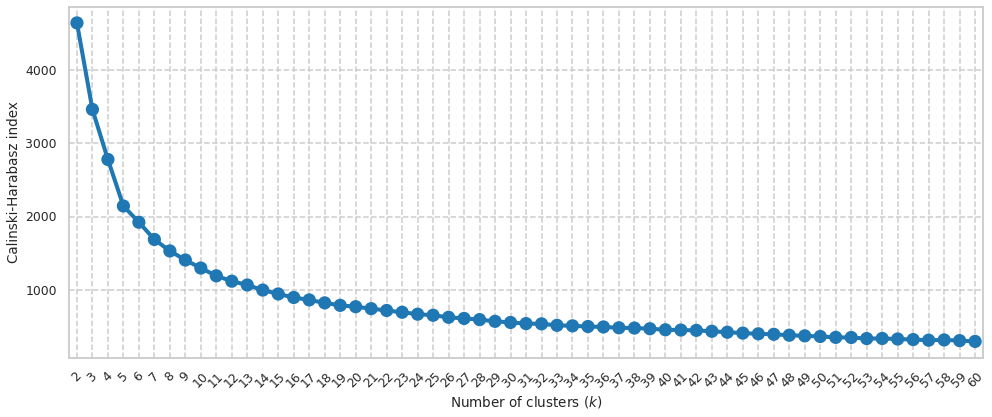

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
5    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
6    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
4     1.000000
5     0.999617
3     0.998912
8     0.988428
7     0.985751
6     0.978302
9     0.965493
10    0.951369
13    0.784308
12    0.741807
16    0.639770
14    0.628535
17    0.573299
11    0.571139
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,0.997281,1.000000,1.000000,0.997281,1.000000,0.997281,1.000000,0.997281
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,0.999044,1.000000,1.000000,0.999044,1.000000,1.000000,0.999044,0.999044,1.000000
6,0.999046,0.976494,0.964693,0.978379,0.975553,0.963759,0.977437,0.974785,0.998088,0.974787


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/SpectralClustering-stability-AFFINITY_rbf-GAMMA_1e_10-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


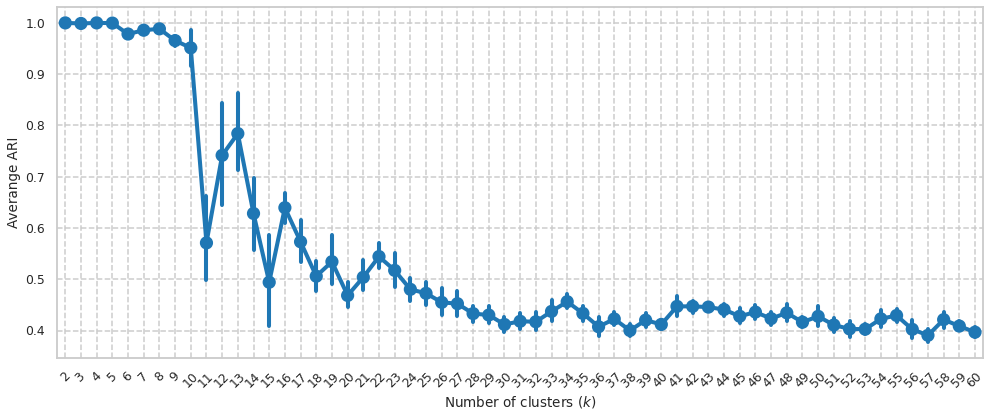

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()